# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [100]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse
from scipy import signal
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import AutoReg

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
# Your code here:
sensor.isnull().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [5]:
# Your code here:
print(f'Dataset contains {sensor.shape[0]} rows and {sensor.shape[1]} columns')

Dataset contains 1751 rows and 12 columns


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [6]:
# Your code here:
#primero establezco una columna de fechas con este rango
sensor["date"]= pd.date_range("2018-01-01 00:00:00","2018-01-01 00:29:10",periods=1751)
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,date
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,2018-01-01 00:00:00
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,2018-01-01 00:00:01
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,2018-01-01 00:00:02
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,2018-01-01 00:00:03
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,2018-01-01 00:00:04


Assign the time series index to the dataframe's index.

In [7]:
# Your code here:
#ahora establezco esa columna como index
# Nota: 'infer’ es para establacer la frecuencia del índice como la frecuencia inferida tras las fechas que se han introducido
sensor.index = pd.DatetimeIndex(sensor.date, freq='infer')
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,date
date,,,,,,,,,,,,,
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,2018-01-01 00:00:00
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,2018-01-01 00:00:01
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,2018-01-01 00:00:02
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,2018-01-01 00:00:03
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,2018-01-01 00:00:04


In [9]:
sensor.dtypes

attitude.roll                float64
attitude.pitch               float64
attitude.yaw                 float64
gravity.x                    float64
gravity.y                    float64
gravity.z                    float64
rotationRate.x               float64
rotationRate.y               float64
rotationRate.z               float64
userAcceleration.x           float64
userAcceleration.y           float64
userAcceleration.z           float64
date                  datetime64[ns]
dtype: object

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

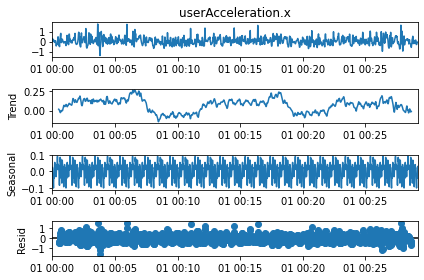

In [13]:
# Your code here:
%matplotlib inline

res = sm.tsa.seasonal_decompose(sensor["userAcceleration.x"],period=60)
res.plot()
print("")

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

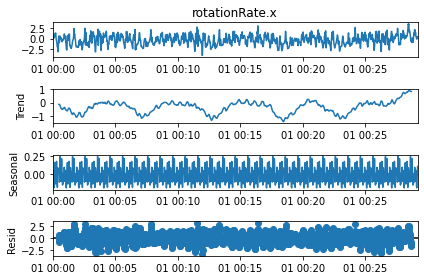

In [18]:
res = sm.tsa.seasonal_decompose(sensor["rotationRate.x"],period=60)
res.plot()
print("")

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

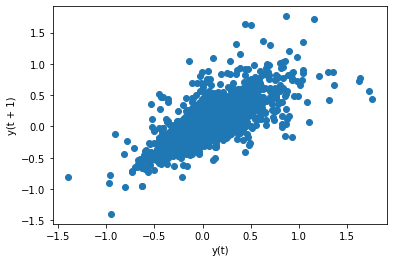

In [27]:
# Your code here:
pd.plotting.lag_plot(sensor["userAcceleration.x"], lag=1)

Create a lag plot for `rotationRate.x`

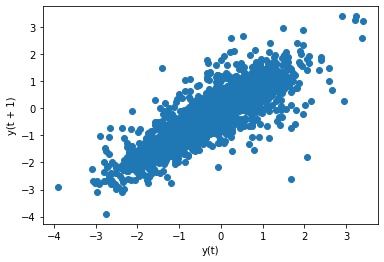

In [21]:
# Your code here:
pd.plotting.lag_plot(sensor["rotationRate.x"], lag=1)

What are your conclusions from both visualizations?

### Your conclusions here:
El modelado de series temporales asume una relación entre una observación y la observación anterior.
Este scatter plot nos da la relación entre cada observación y su obervación anterior.
Si los puntos se ajustan a una diagonal con pendiente positiva, sugiere que hay una correlación positiva de los datos.
Por tanto, los datos de ambas series temporales autocorrelacionan con un lag=1 (es decir mirando la relación con el dato anterior). 

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [30]:
# Your code here:
# NOTA: para el test ADF la Ho es que una raíz unitaria está presente en la muestra de una serie temporal, es decir, no hay estacionalidad
print(adfuller(sensor["userAcceleration.x"]))

(-17.95799408616976, 2.823439483037483e-30, 4, 1746, {'1%': -3.434100824760071, '5%': -2.863196780129223, '10%': -2.5676520210882936}, -727.6140124402791)


NOTA: el test devuelve: la estadística del test, p-value, el numero de lags usados, el numero de observaciones usadas, valores criticos para la estadística del test
Como el p-value es menor de 0.05, en un intervalo de confianza del 95%, podemos rechazar la hipotesis nula, es decir sí hay estacionalidad

In [33]:
print(adfuller(sensor["rotationRate.x"]))
#También se rechaza la hipótesis nula, es decir, hay estacionalidad

(-5.269860625086415, 6.3202303359123905e-06, 25, 1725, {'1%': -3.4341465551936534, '5%': -2.863216966926812, '10%': -2.567662770090317}, 2619.6049719981947)


What are your conclusions from this test?

In [13]:
# Your conclusions here:
#La Ho establece que no hay estacionalidad.
# En ambos el p-valor es menor de 0.05, es decir, existe estacionalidad en ambas variables

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [36]:
# Your code here:
train = sensor["userAcceleration.x"][:-10]
test = sensor["userAcceleration.x"][-10:]
display(train.shape)
display(test.shape)

(1741,)

(10,)

In [37]:
model = ARMA(train, order=(2,1))
arma_results = model.fit()

In [38]:
y_pred = arma_results.predict(start=len(train),end=len(train)+len(test)-1, dynamic=False)

In [39]:
results = pd.DataFrame({"GT":test,"pred":y_pred,"diff":y_pred-test})
results

,GT,pred,diff
date,,,
2018-01-01 00:29:01,0.149749,0.173149,0.023400
2018-01-01 00:29:02,0.038461,0.142896,0.104435
2018-01-01 00:29:03,-0.169175,0.100522,0.269697
2018-01-01 00:29:04,-0.300361,0.070106,0.370467
2018-01-01 00:29:05,-0.270174,0.056099,0.326273
2018-01-01 00:29:06,-0.268367,0.053778,0.322145
2018-01-01 00:29:07,-0.102444,0.056790,0.159234
2018-01-01 00:29:08,-0.085590,0.060646,0.146236
2018-01-01 00:29:09,-0.048105,0.063316,0.111421


To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [47]:
# Your code here:
rmse(results["GT"].values,results["pred"].values)

0.22529863653820809

In [48]:
#Considero que la predicción no es muy buena, ya que el rmse dice que los datos predichos se pueden ir más 0.225 o menos 0.225 del 
#dato real. Teniendo en cuenta que los datos están en el order de -0.30 a 0.15, el error es demasiado alto

### Voy a volver a modelar, pero pasando primero los datos por un filtro de paso bajo

In [72]:
Fc=1/20 #frecuencia de corte del filtro (la definimos nosotros)
Fm = 1  ##frecuencia de muestreo. Toma la muestra cada segundo, por tanto 1/1seg
## 3 es el orden del filtro. Y Fc/Fm es la frecuencia(s) crítica. Para filtros de paso bajo y paso alto, debe ser un número entre 0 y 1
# rl tipo por defecto es bajo, por eso no pongo nada dentro de signal.butter
b, a = signal.butter(3, Fc/Fm)  
userAccX = pd.Series(signal.filtfilt(b, a, sensor["userAcceleration.x"].values), index=sensor["userAcceleration.x"].index)

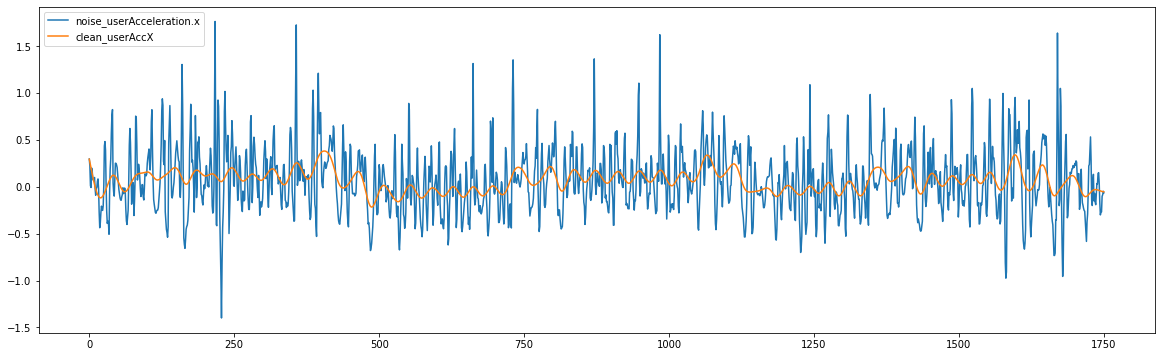

In [73]:
plt.figure(figsize=(20,6))
plt.plot(sensor["userAcceleration.x"].values)
plt.plot(userAccX.values)
plt.legend(["noise_userAcceleration.x","clean_userAccX"])

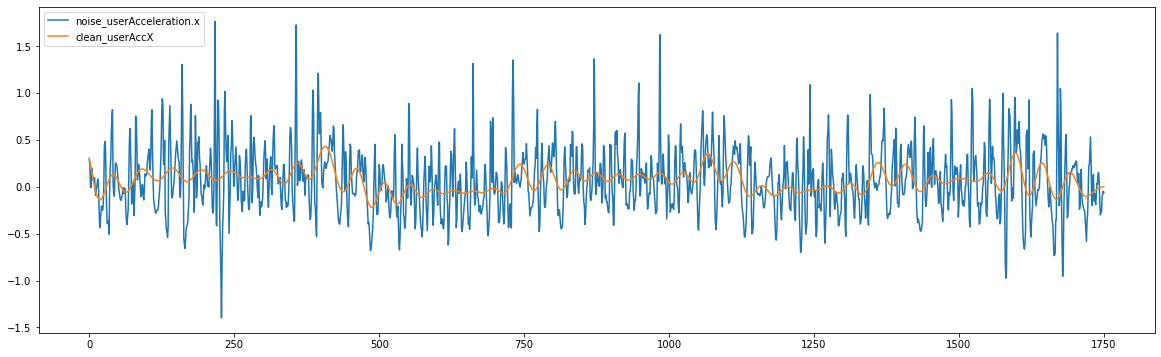

In [75]:
#pruebo con otros valores
Fc=1/20 
Fm = 1  
b, a = signal.butter(10, Fc/Fm)  
userAccX = pd.Series(signal.filtfilt(b, a, sensor["userAcceleration.x"].values), index=sensor["userAcceleration.x"].index)
plt.figure(figsize=(20,6))
plt.plot(sensor["userAcceleration.x"].values)
plt.plot(userAccX.values)
plt.legend(["noise_userAcceleration.x","clean_userAccX"])

Cuanto más alto sea el orden del filtro (en la anterior gráfica era 3 y ahora es 10), más suaves son las oscilaciones

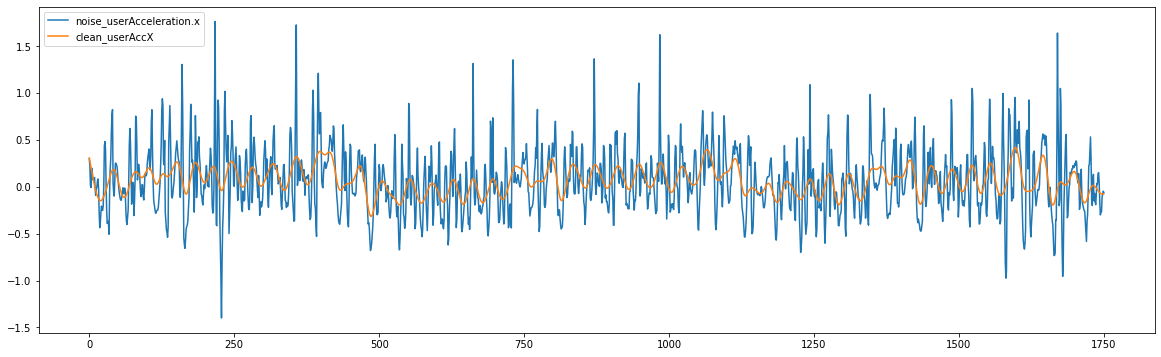

In [90]:
#pruebo con otros valores
Fc=1/15
Fm = 1  
b, a = signal.butter(3, Fc/Fm)  
userAccX = pd.Series(signal.filtfilt(b, a, sensor["userAcceleration.x"].values), index=sensor["userAcceleration.x"].index)
plt.figure(figsize=(20,6))
plt.plot(sensor["userAcceleration.x"].values)
plt.plot(userAccX.values)
plt.legend(["noise_userAcceleration.x","clean_userAccX"])

Cuanto más alta sea la frecuencia de análisis (es decir, menor diferencia con la frecuencia de muestreo), menos ruido se elimina. Pero si es muy alta, se pierden todas las diferencias entre una medida y otra.

In [93]:
#Voy a probar con esta ultima condicion
train = userAccX.values[:-10]
test = sensor["userAcceleration.x"][-10:] #voy a dejar los valores del test con el ruido
display(train.shape)
display(test.shape)

(1741,)

(10,)

In [102]:
#me da error con ARMA model, voy a intentar AutoReg (AR está deprecado)
model = AutoReg(train,lags=4)
arma_results = model.fit()
y_pred = arma_results.predict(start=len(train),end=len(train)+len(test)-1, dynamic=False)
results = pd.DataFrame({"GT":test,"pred":y_pred,"diff":y_pred-test})
results

,GT,pred,diff
date,,,
2018-01-01 00:29:01,0.149749,-0.049224,-0.198973
2018-01-01 00:29:02,0.038461,-0.056980,-0.095441
2018-01-01 00:29:03,-0.169175,-0.063562,0.105613
2018-01-01 00:29:04,-0.300361,-0.068633,0.231728
2018-01-01 00:29:05,-0.270174,-0.071898,0.198276
2018-01-01 00:29:06,-0.268367,-0.073118,0.195249
2018-01-01 00:29:07,-0.102444,-0.072116,0.030328
2018-01-01 00:29:08,-0.085590,-0.068792,0.016798
2018-01-01 00:29:09,-0.048105,-0.063126,-0.015021


In [103]:
rmse(results["GT"].values,results["pred"].values)

0.13874829817034645

El error es menor que en el caso anterior de ARMA sin pasar por filtro de paso bajo. 
Voy a probar lo mismo para diferentes lags (no solo 4, como en el anterior)

In [129]:
lista_lags=[]
for i in range(10):
    model = AutoReg(train,lags=i)
    arma_results = model.fit()
    y_pred = arma_results.predict(start=len(train),end=len(train)+len(test)-1, dynamic=False)
    results = pd.DataFrame({"GT":test,"pred":y_pred,"diff":y_pred-test})
    lista_lags.append((i,rmse(results["GT"].values,results["pred"].values))) 
lista_lags.sort(key=lambda x: x[1])   
print(f'lags={lista_lags[0][0]},rmse={lista_lags[0][1]}')

lags=5,rmse=0.13721770785517956


In [ ]:
#Para los parámetros de orden de filtro 3 y Fc = 1/15, el número de lags optimos sería 5 para obtener un menor rmse a la hora de 
#predecir nuevos valores

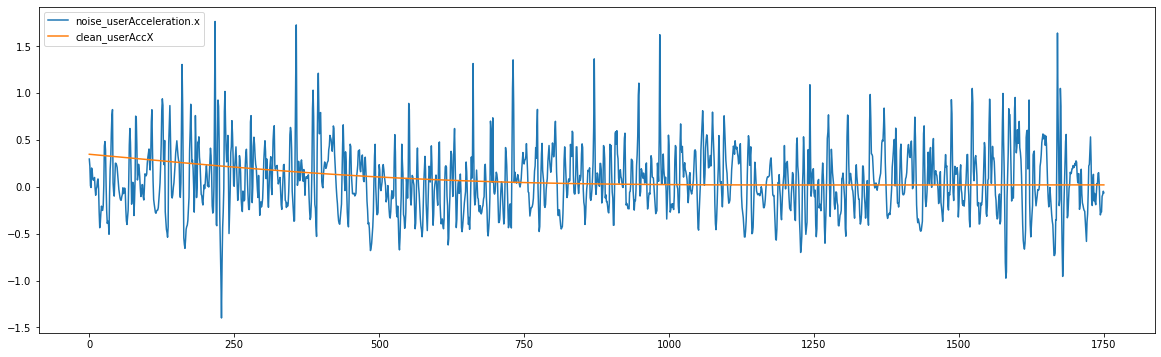

In [137]:
#por ultimo voy a probar aplanando completanmente la gráfica
Fc=1/1000
Fm = 1  
b, a = signal.butter(3, Fc/Fm)  
userAccX = pd.Series(signal.filtfilt(b, a, sensor["userAcceleration.x"].values), index=sensor["userAcceleration.x"].index)
plt.figure(figsize=(20,6))
plt.plot(sensor["userAcceleration.x"].values)
plt.plot(userAccX.values)
plt.legend(["noise_userAcceleration.x","clean_userAccX"])

In [138]:
train = userAccX.values[:-10]
test = sensor["userAcceleration.x"][-10:] #voy a dejar los valores del test con el ruido
display(train.shape)
display(test.shape)

(1741,)

(10,)

In [139]:
lista_lags=[]
for i in range(10):
    model = AutoReg(train,lags=i)
    arma_results = model.fit()
    y_pred = arma_results.predict(start=len(train),end=len(train)+len(test)-1, dynamic=False)
    results = pd.DataFrame({"GT":test,"pred":y_pred,"diff":y_pred-test})
    lista_lags.append((i,rmse(results["GT"].values,results["pred"].values))) 
lista_lags.sort(key=lambda x: x[1])   
print(f'lags={lista_lags[0][0]},rmse={lista_lags[0][1]}')

lags=9,rmse=0.18803669823448732


In [140]:
#quitar los ruidos completamente no funciona mejor.

El mejor resultado lo he obtenido con orden de filtro 3 y Fc = 1/15 y posteriormente modelando con AR con un número de lags igual a 5